# Lab 04


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
pd.set_option('display.max_columns', 500)

%matplotlib inline

In [3]:
# Read in subset of footballer data

model_data = pd.read_csv('footballer_reduced.csv')
model_data.head(50)

,age,height_cm,weight_kg,work_rate_att,overall
0,32,185.0,80.0,High,94
1,30,170.0,72.0,Medium,93
2,25,175.0,68.0,High,92
3,30,182.0,86.0,High,92
4,31,193.0,92.0,Medium,92
5,28,185.0,79.0,High,91
6,26,193.0,76.0,Medium,90
7,26,173.0,76.0,High,90
8,27,182.0,78.0,Medium,90
9,29,184.0,87.0,High,90


In [4]:
# Turn category into numeric variables

model_data = pd.get_dummies(model_data, drop_first=True)
model_data.head(50)

,age,height_cm,weight_kg,overall,work_rate_att_Low,work_rate_att_Medium
0,32,185.0,80.0,94,0,0
1,30,170.0,72.0,93,0,1
2,25,175.0,68.0,92,0,0
3,30,182.0,86.0,92,0,0
4,31,193.0,92.0,92,0,1
5,28,185.0,79.0,91,0,0
6,26,193.0,76.0,90,0,1
7,26,173.0,76.0,90,0,0
8,27,182.0,78.0,90,0,1
9,29,184.0,87.0,90,0,0


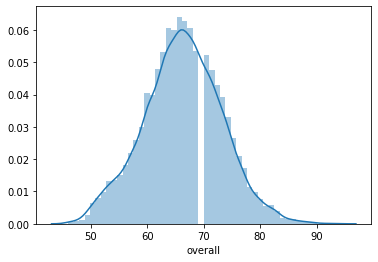

In [5]:
#What if the dataset were smaller?
#np.random.seed(0)
#model_data = model_data.sample(100)
# Let's check out our prediction target, the 'overall' variable

sns.distplot(model_data.overall)

In [ ]:
# Define our X and y

y = model_data.overall
X = model_data.drop('overall', axis = 'columns')
# Split into train&validation, test
# Random state assures that folds are consistent across models
Xtrainval, Xtest, ytrainval, ytest = train_test_split(X,y, test_size = 0.10, random_state = 0)
print(Xtrainval.shape,Xtest.shape)

In [ ]:
# Check training loss

linmodel = LinearRegression().fit(Xtrainval,ytrainval)
trainloss = np.mean((linmodel.predict(Xtrainval) - ytrainval)**2)
print(f"Training loss: {trainloss}")

In [ ]:
# Check CV loss

cv_scores = cross_val_score(LinearRegression(), Xtrainval, ytrainval, 
                            cv=5, scoring=make_scorer(mean_squared_error))

print(cv_scores)
print(f"CV loss: {cv_scores.mean()}")

In [ ]:
# Construct a new feature - age squared

Xtrainval2 = Xtrainval
Xtrainval2 = Xtrainval2.assign(age2 = Xtrainval.age**2)

In [ ]:
# Check training loss

linmodel2 = LinearRegression().fit(Xtrainval2,ytrainval)
trainloss2 = np.mean((linmodel2.predict(Xtrainval2) - ytrainval)**2)
print(f"Training loss with squared age: {trainloss2}")

In [ ]:
# Check CV loss

cv_scores2 = cross_val_score(LinearRegression(), Xtrainval2, ytrainval, 
                           cv=5, scoring=make_scorer(mean_squared_error))
print(cv_scores2)
print(f"CV loss with squared age: {cv_scores2.mean()}")


In [ ]:
# Construct new features that are products of all possible pairs of features (quadratic)

model_pipeline_intxn = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linear_regression', LinearRegression())
])

interact_model = model_pipeline_intxn.fit(Xtrainval,ytrainval)

XX = PolynomialFeatures(include_bias=False).fit_transform(Xtrainval)
XX.shape

In [ ]:
# Check training loss

trainloss3 = np.mean((interact_model.predict(Xtrainval) - ytrainval)**2)
print(f"Training loss with all quadratic features: {trainloss3}")

In [ ]:
# Check CV loss

cv_scores3 = cross_val_score(model_pipeline_intxn, 
                           Xtrainval, 
                           ytrainval, 
                           cv = 5, 
                           scoring = make_scorer(mean_squared_error))
print(cv_scores3)
print(f"Training loss with all quadratic features: {cv_scores3.mean()}")
